In [1]:
import numpy as np
import sympy as sym
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.special import ellipe
from scipy.special import ellipk

#parameters for Galaxy NGC 5907
#G = (4.300e-6)*2*60*(180/np.pi)*(np.arctan(1/(2*11e3)))    #gravitational constant (kpc/solar mass*(km/s)^2)
#h = 5.7*2*60*(180/np.pi)*(np.arctan(1/(2*11e3)))           #radial scale-length (arcmin)
#z0 = 0.83                                                  #half-thickness (kpc)
#R = 19.3*2*60*(180/np.pi)*(np.arctan(1/(2*11e3)))          #cut-off radius (arcmin)
#d = 0.99*2*60*(180/np.pi)*(np.arctan(1/(2*11e3)))          #cut-off length upper limits (arcmin)
#mu0 = 115e6                                                #central surface density (solar mass/kpc^2)

#parameters for Galaxy NGC 5533
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
h = 8.9                                                     #radial scale-length (kpc)
rho00 = 0.31e9                                              #prefactor that will cancel
epsdisk = 5.0                                              #from Noordermeer's paper
absmag = -22.02                                             #absolute magnitude 
magsun = 4.42                                               #absolute magnitude of the sun

#rho00 = 0.31e9                                              #central 3D density (solar mass/kpc^2)                                                
#mu0 = 1e9                                                   #central surface density (solar mass/kpc^2)

z0 = 0.2*h                                                  #half-thickness (kpc)
R = 4*h                                                     #cut-off radius (kpc)
d = 0.2*h                                                   #cut-off length upper limits (kpc)
                                             
#definitions
def x(r,u,xi):
    return ((r**2)+(u**2)+(xi**2))/(2*r*u)
#x = lambda r,u,xi: ((r**2)+(u**2)+(xi**2))/(2*r*u)

def px(r,u,xi):
    return x(r,u,xi)-(np.sqrt((x(r,u,xi)**2)-1))
#p = lambda x: x-(np.sqrt((x**2)-1))


#rho00 = mu0/(2*z0)

#print(px(1,1,0))
#print(R+d)
#print(z0)
#print(R)
#print(d)

152067592.03860623
152016341.9378595


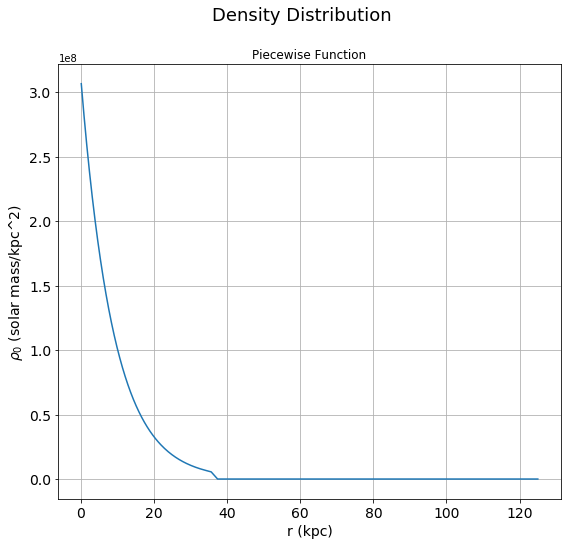

In [2]:
#density piecewise function
def rho0(r, R, h, d):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: rho00*np.exp(-r/h), lambda r: rho00*np.exp(-R/h)*(1-((r-R)/d)), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

ra = np.linspace(0.1, 125, 500)
#ra = np.linspace(0, 25, 500)

#plotting piecewise function
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho0(ra, R, h, d), linestyle='solid', label='$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('$\\rho_0$ (solar mass/kpc^2)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

#plt.legend(fontsize=16);                                   #adding legend

print(rho0(6.339, R, h, d))
print(rho0(6.342, R, h, d))

-17086246.296472605
-17080487.858186457


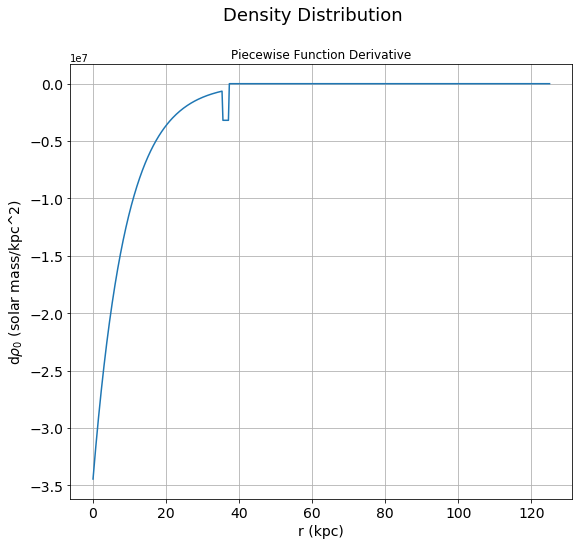

In [3]:
#partial derivative of rho(u,xi)
def durho0(r, R, h, d):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: -(1/h)*rho00*np.exp(-r/h), lambda r: -(1/d)*rho00*np.exp(-R/h), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

#plotting piecewise function derivative
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, durho0(ra, R, h, d), linestyle='solid', label='d$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel ('d$\\rho_0$ (solar mass/kpc^2)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

#plt.legend(fontsize=16);                                   #adding legend

print(durho0(6.339, R, h, d))
print(durho0(6.342, R, h, d))

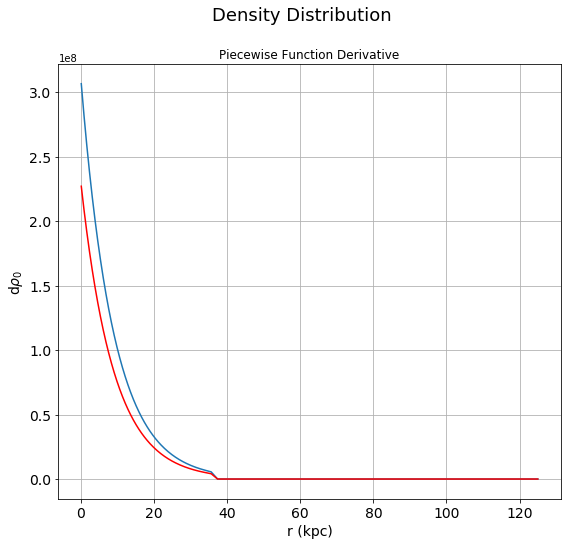

In [4]:
#disk density distribution
rho_rz = lambda r,z: rho0(r, R, h, d)*(np.power(sym.cosh(z/z0), (-2)))
drho_rz = lambda r,z: durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

#z = np.linspace(0, 25, 500)
#print(np.shape(r3))
#print(np.shape(z3))
#print(np.shape(rho_rz(r3,z3)))

#plotting disk density distribution
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho_rz(ra,0), linestyle='solid', label='z=0')          
plt.plot(ra, rho_rz(ra,1), linestyle='solid', label='z=1', color='r')

#plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

#plt.legend(fontsize=16);                                   #adding legend

#print(rho_rz(6.339,0))
#print(rho_rz(6.342,0))
#print(drho_rz(6.339,0))
#print(drho_rz(6.342,0))

85627549.80849361


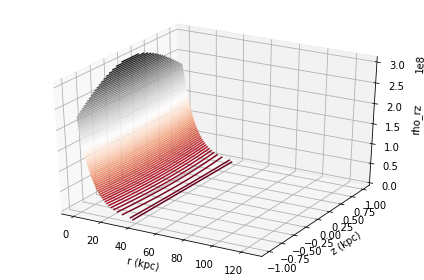

In [5]:
#plotting disk density distribution in 3D
from mpl_toolkits import mplot3d

def rho_rz2(r, z):
    return rho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

za = np.linspace(-1, 1, 500)

RA, ZA = np.meshgrid(ra, za)
RZ = rho_rz2(RA, ZA)

ax = plt.axes(projection='3d')
ax.contour3D(RA, ZA, RZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('rho_rz');

print(rho_rz2(2,2))

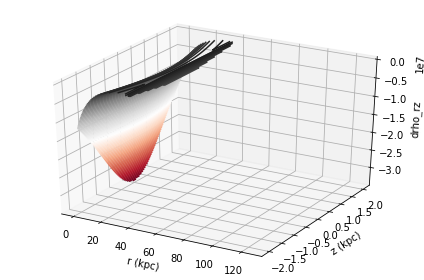

In [6]:
#plotting derivative of disk density distribution in 3D
def drho_rz2(r, z):
    return durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

zb = np.linspace(-2, 2, 500)

RB, ZB = np.meshgrid(ra, zb)
RZB = drho_rz2(RB, ZB)

ax = plt.axes(projection='3d')
ax.contour3D(RB, ZB, RZB, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('drho_rz');

In [13]:
#complete elliptic integral
K = lambda r,u,xi: ellipk(px(r,u,xi)) - ellipe(px(r,u,xi))

print(K(1,1,1))

0.35734399698214614


-8486222.452085793


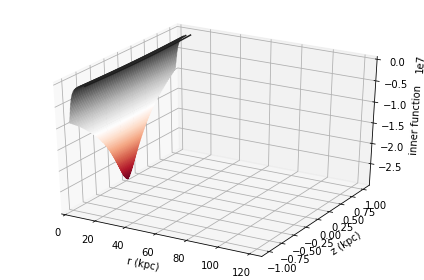

In [8]:
#inner function
f = lambda r,u,z: u*drho_rz(u, z)*(2*K(r,u,z))/(np.pi*np.sqrt(r*u*px(r,u,z)))

#za = np.linspace(-1, 1, 500)

#plot inner function 3D
def f2(r, u, z):
    return u*drho_rz(r, z)*(2*K(r,u,z))/(np.pi*np.sqrt(r*u*px(r,u,z)))

RC, ZC = np.meshgrid(ra, za)
RZC = f2(RC, 1, ZC)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RC, ZC, RZC, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlim(0,125)
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('inner function');

print(f(1,1,1))

In [12]:
#integrate function
#intf = lambda xi: quad(f, 0, np.inf, args=(r,u,))
f3 = lambda z,r,u: f(r,u,z)
intf = lambda r,u: quad(f3, 0, np.inf, args=(r,u,))[0]

#print(intf(1,1))

-25163286.69048213


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
#integrate outer function
intf3 = lambda u,r: intf(r,u)
intintf = lambda r: quad(intf3, 0.1, 125, args=(r,))[0]

#print(intintf(10))

In [43]:
#absolute magnitude to luminosity
L0 = np.power(10, (0.4*(magsun-absmag)))

#mass of disk
#def Mintrho(r):
#    return quad(rho_rz, -125, 125, args=(r,))[0]
rho_rz_r = lambda z,r: rho_rz(r,z)*r

Mintrho = lambda r: quad(rho_rz_r, -125, 125, args=(r,))[0]

Mintintrho = quad(Mintrho, 0, 125)[0]

#epsdisk = Mintintrho/L0
pref = epsdisk*(L0/Mintintrho)

#multiplying by epsylon
F = lambda r: 4*np.pi*G*intintf(r)*pref

#print(epsdisk)
#print(L0)
#print(Mintintrho)
#print(F(1))

In [ ]:
#radial force function
#F = lambda r: 4*np.pi*G*intintf(r)
#print(F(1))

#disk velocity
rd = np.linspace(0.1, 125, num=100)
Fv = np.vectorize(F)
v = np.sqrt(-rd*Fv(rd))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from spl

In [ ]:
#plot disk velocity
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(rd, v, linestyle='solid', label='Disk Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Disk Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,125)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

#plt.legend(fontsize=16);                                   #adding legend
#plt.savefig('DiskVelocity100pts.png')